# What you'll learn

You will be able to:
* Create Tekton tasks.
* Explain how to pass parameters to a Tekton task.
* Organize tasks into a Tekton pipeline.

# Conceptual building blocks

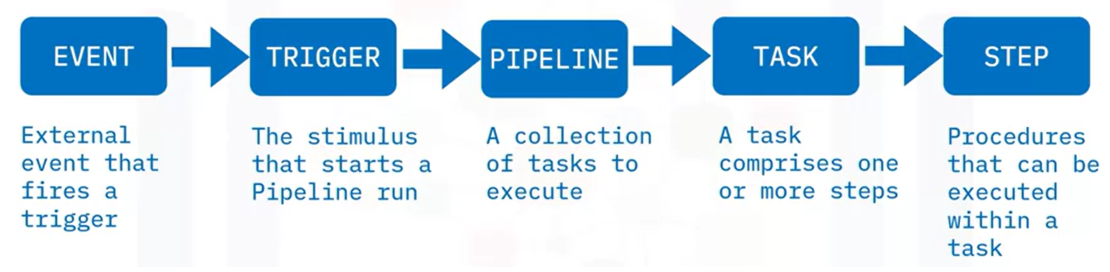
* Referring to the conceptual building blocks of `events`, `triggers`, `pipelines`, `tasks`, and `steps`.
* You're now going to work from right to left and define your steps and tasks.
* Think about what you need in your **Continuous Delivery pipeline**.

# Complete Pipeline

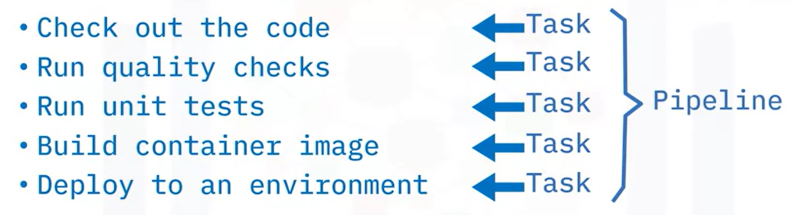

**Checkout the code**:
* You first have to start with the code.
* So, you need something that will check out the code from a version control system.

**Run quality checks**:
* Then, you probably want to run quality checks.
* These are checks like linters and other tools that check for various quality issues.

**Run unit tests**: You definitely want to run the unit tests to make sure that all the code is working as expected.

**Build Container Image**:
* Once all the unit tests have passed, you're now ready to build your artifact.
* In this case, it's a container image.

**Deploy to an environment**: Finally, you want to deploy into some environment—development, test, or staging.

> All of these become tasks in Tekton that run one after the other. When you put them all together, it’s called a `pipeline`.

**Let's see how you can start building this pipeline**.

# Checkout task

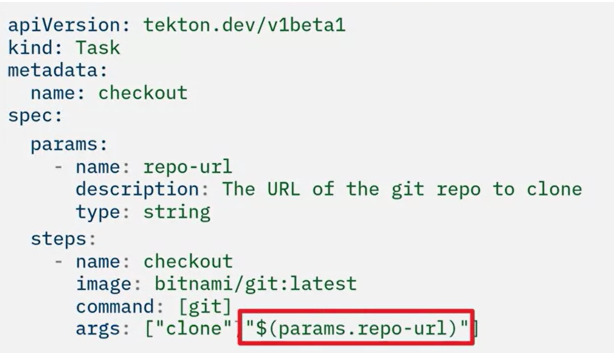

You start by writing the **checkout task**. 

All of these definitions are described in **YAML files** called **Kubernetes manifests**.
* Every manifest must define an `apiVersion` to use, which in this example, is `tekton.dev/v1beta1`.
* Tekton defines new custom resource definitions in Kubernetes.

You must tell Kubernetes what `kind` of resource to use, which in this example, is a `task`.

Next, you need to give the task a `name` in the `metadata` section, which in this example, is called `checkout`.

Now, the **specification (`spec`)** section of your manifest starts.
* A **task is a collection of steps**, so you add the `steps` keyword.
    * Then you define a step and give it a `name`, which in this example, is  also called `checkout`.
    * Remember that
        * **a step is contained within a task**, and
        * that **task runs on a pod**.
    * **Hence, every step executes in a new container in that pod**.
    * So, the next thing you need to define is what image to use to create that container.
    * You use the `image` keyword followed by `bitnami/git:latest`.
    * You could've used any image that had a Git client installed.
    * Bitnami maintains a number of images that are great for creating CI/CD pipelines, and this Git image will do just fine.
    * Next, you need to define the command to run inside of that container, and that is `git` command to clone the repository.
    * Finally, you need to tell the git command what to do,
        * So you pass in `clone` as the first argument.
        * But there's a problem, you need **two arguments**.
        * You need the **URL of the repository** to clone as well.
        * It looks like you're going to need to pass in a second argument that you currently don't have.
    * So, let's go define one.
    * **Parameters** are defined with the `params` keyword.
        * You give the parameter the name `repo-url`.
        * You can also give it a `description` so that people know what the parameter is for and the `type` so that they know to pass it in a `string`.
    * Now you can go back to the arguments and pass in the message.
    * ***But how do you know how to reference it?***
    * The subsection in the `spec` section is `params`, and the name of the parameter is `repo-url`.
    * So, you change the argument to **reference** `$(params.repo-url)` to match the **parameter name** that you want.
    * As you might’ve guessed, you could have **any number of parameters**.
    * You can reference them by using params dot whatever the parameter’s name is.
    * That **completes your task definition**.

Now that you’ve created your first task, let’s turn our attention to defining a pipeline.

# Pipeline

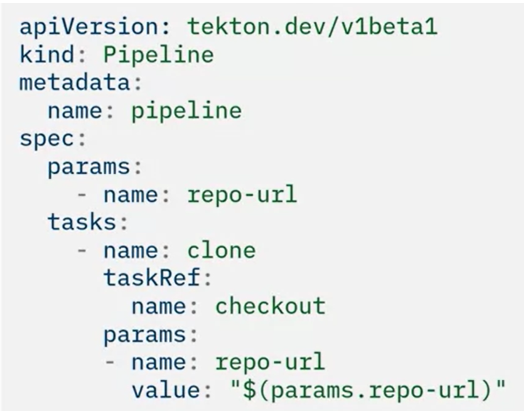

Just like the task definition, a **pipeline definition** is a **Kubernetes manifest**.

So, you start by specifying the `apiVersion`, which in this example, is `tekton.dev/v1beta1`.

Next, you tell it what `kind` of resource this is, which in this example, is a `pipeline` resource.

You want to give it a name, in the `metadata` section, which in this example, is also `pipeline`.

Now, you can start with your specifications (`spec`).
* Since you already know that the task you’re going to use has a **parameter** called **repo-url**.
* You define that **parameter** now by declaring a `params` with `name` as `repo-url`.

Now you can start adding **tasks** to the pipeline.
* You only add one task for now, but the **dash(`-`)** indicates that this is a **list** and **there could be multiple tasks**.
* You name your first task `clone`.
    * Then, you need to **reference the task** that you’ve already written.
    * So you add the `taskRef` keyword, and then **reference the `name` of the task** called `checkout`.
* You know that the checkout task requires a **parameter**, so you declare that here.
    * The **`name` of the parameter** you want to address is `repo-url`.
    * The **value of that repo-url** is going to come from `$(params.repo-url)`.
    * This means that whatever **repo-url** you pass into the pipeline will be passed on to any task that requires it.

# Run the pipeline

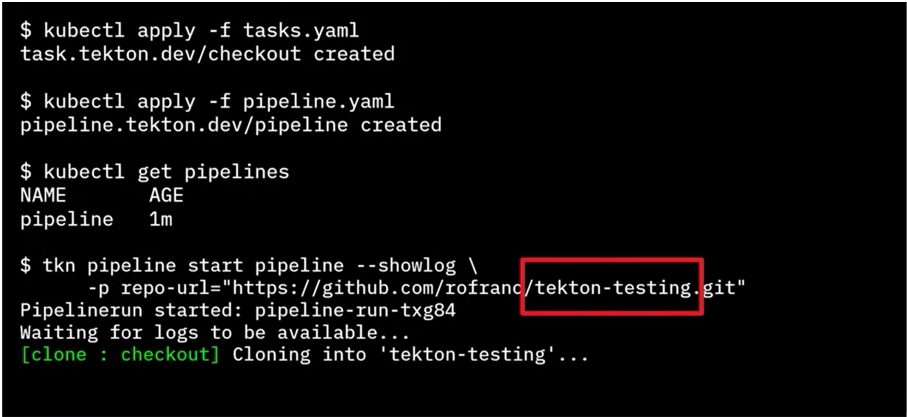

Now that you’ve defined at least one task and one pipeline, you’re ready to run the pipeline.
* First, you use the **`kubectl apply -f tasks.yaml`** file.
* Kubernetes replies, telling you that the checkout task has been created.
* Next, you use the  **`kubectl apply -f pipeline.yaml`** file that contains your pipeline.
* And again, you see that the pipeline has been created.

**It’s important to understand that you haven’t actually created a task or pipeline at this point**.
* **What you’ve created is a task definition and a pipeline definition**.
* The actual task and pipeline are created by other resources called **`TaskRun`** and **`PipelineRun`**, respectively.

Since Tekton resources are Kubernetes resources, you can check that the pipeline definition was created using the command **`kubectl get pipelines`**. This will show you **how long ago that pipeline definition was created**, in this case, one minute ago.

**Finally, you’re ready to run your pipeline with the following command:**
```
tkn pipeline start pipeline --showlog -p repo-url="https://github.com/rofranc/tekton-testing.git"
```
* You do this using the Tekton command line interface, or CLI.
* The command is **`tkn pipeline start`** followed by the pipeline name that you simply called **`pipeline`**.
* You add the **`--showlog`** parameter so that it will wait for the logs and display them on the console.
* You **pass in any parameters** you know the pipeline needs using the **`-p`** flag.
* In this case, the pipeline needs a **`repo-url`** parameter, so you pass in a **URL** from one of your GitHub repositories.
* The Tekton CLI is creating the `PipelineRun` and `TaskRun` resources behind the scenes.
* These are the resources that **create the actual running pipeline and tasks**.
* You could have done this manually and accomplished the same result, but the Tekton CLI automates all of this for you, so why not use it? 
* Then, you wait for the logs to come back.
* Eventually, you see that the **checkout step** of the **clone task** has returned the git message that it was cloning, and the repo name in the message matches the repo name you gave it in the URL.

You have a successful pipeline run.

You can continue to build this pipeline by creating more tasks and adding them to the pipeline definition.

# Summary

You learned that:
* Tekton tasks can be written to run in any container and call any command.
* Tasks can accept external parameters.
* Tekton pipelines can be created by referencing tasks and passing any required parameters to them.